In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

### 1.

From the dataset 'HW3_data.csv', let $X_{t}=height,\ Y_{t}=weight,\ i=1,2,...,n$.

(a) Draw scatter plot.

In [2]:
df_1 = pd.read_csv('./data/HW3_data.csv', header=0, names=['X', 'Y'])
df_1.head()

,X,Y
0,181,78
1,161,49
2,170,52
3,160,53
4,158,50


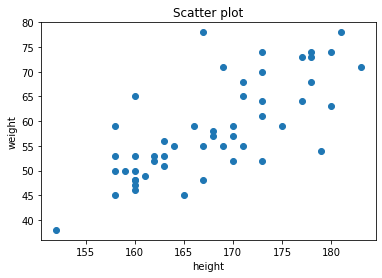

In [3]:
plt.scatter(df_1.X, df_1.Y)
plt.xlabel('height')
plt.ylabel('weight')
_ = plt.title('Scatter plot')

(b) Compute correlation coefficient.

In [4]:
df_1.corr().to_numpy()[0, 1]

0.7362765055636867

(c) Estimate coefficient a of the following linear regression by OLSE:
$$ Y_{i} = aX_{i} + \epsilon_{i},\ i=1,2,...,n $$
and draw the regression graph together with scatter plot.

In [5]:
# 1
print('a =', np.dot(df_1.X.T, df_1.Y) / np.dot(df_1.X.T, df_1.X))

a = 0.34871194785984383


In [6]:
# 2
lr_1_no = LinearRegression(fit_intercept=False).fit(df_1[['X']], df_1.Y)
print('a =', lr_1_no.coef_)

a = [0.34871195]


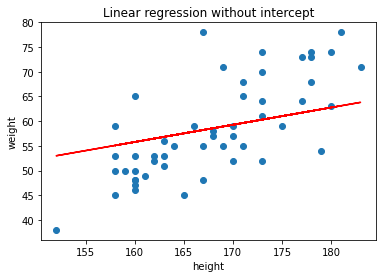

In [7]:
plt.scatter(df_1.X, df_1.Y)
plt.plot(df_1.X, lr_1_no.predict(df_1[['X']]), color='r')
plt.xlabel('height')
plt.ylabel('weight')
_ = plt.title('Linear regression without intercept')

(d) Estimate coefficient a, b of the following linear regression by OLSE:
$$ Y_{i} = b + aX_{i} + \epsilon_{i},\ i=1,2,...,n $$
and draw the regression graph together with scatter plot.

In [8]:
# 1
a_1 = np.dot((df_1.X - df_1.X.mean()), df_1.Y - df_1.Y.mean()) / sum((df_1.X - df_1.X.mean())**2)
b_1 = df_1.Y.mean() - a_1 * df_1.X.mean()
print('b =', b_1)
print('a =', a_1)

b = -100.78198435190583
a = 0.9478894056707391


In [9]:
# 2
lr_1_intercept = LinearRegression(fit_intercept=True).fit(df_1[['X']], df_1.Y)
print('b =', lr_1_intercept.intercept_)
print('a =', lr_1_intercept.coef_)

b = -100.78198435190583
a = [0.94788941]


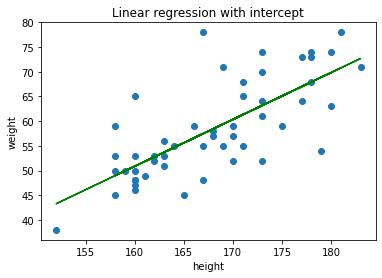

In [10]:
plt.scatter(df_1.X, df_1.Y)
plt.plot(df_1.X, lr_1_intercept.predict(df_1[['X']]), color='g')
plt.xlabel('height')
plt.ylabel('weight')
_ = plt.title('Linear regression with intercept')

(e) Among two regression results, which has less errors? Compute RMSE.

In [11]:
RMSE_1_no = np.sqrt(np.mean((df_1.Y - (lr_1_no.coef_ * df_1.X))**2))
RMSE_1_intercept = np.sqrt(np.mean((df_1.Y - (lr_1_intercept.intercept_ + lr_1_intercept.coef_ * df_1.X))**2))
print('RMSE of (c): ', RMSE_1_no)
print('RMSE of (d): ', RMSE_1_intercept)

RMSE of (c):  7.964656591064622
RMSE of (d):  6.560207596629452


(f) Draw two regression graphs in (c) and (d) with the scatter plot together on one plane.

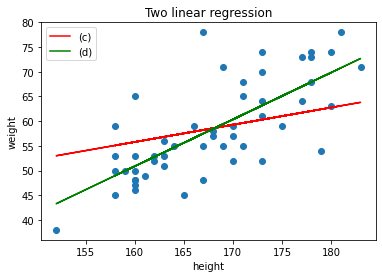

In [12]:
plt.scatter(df_1.X, df_1.Y)
plt.plot(df_1.X, lr_1_no.predict(df_1[['X']]), color='r')
plt.plot(df_1.X, lr_1_intercept.predict(df_1[['X']]), color='g')
plt.legend(labels=('(c)', '(d)'))
plt.xlabel('height')
plt.ylabel('weight')
_ = plt.title('Two linear regression')

### 2.

From the dataset 'HW3_covid_USA.csv', consider bitcoin data. Let $X_{t}$ be the bitcoin data at first 60 days.

(a) Using the following linear regression, estimate two parameters by the OLSE:
$$X_{t} = b_{0} + b_{1}t + \epsilon_{t}$$

In [13]:
df_2 = pd.read_csv('./data/HW3_covid19_USA.csv')[:60]
df_2['t'] = range(len(df_2))
df_2.head()

,date,bitcoin,covid,t
0,20200120,8638.181440,5,0
1,20200121,8652.683763,0,1
2,20200122,8708.786013,0,2
3,20200123,8635.074357,0,3
4,20200124,8384.088777,1,4


In [14]:
# 1
b1 = np.dot((df_2.t - df_2.t.mean()), df_2.bitcoin - df_2.bitcoin.mean()) / sum((df_2.t - df_2.t.mean())**2)
b0 = df_2.bitcoin.mean() - b1 * df_2.t.mean()
print('b0 =', b0)
print('b1 =', b1)

b0 = 10051.474005958467
b1 = -43.37664676751874


In [15]:
# 2
lr_2 = LinearRegression(fit_intercept=True).fit(df_2[['t']], df_2.bitcoin)
print('b0 =', lr_2.intercept_)
print('b1 =', lr_2.coef_)

b0 = 10051.474005958467
b1 = [-43.37664677]


(b) Draw two graphs of $X_{t}$ and the estimated regression of the OLSE.

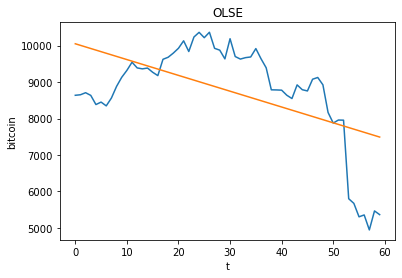

In [16]:
plt.plot(df_2.t, df_2.bitcoin)
plt.plot(df_2.t, lr_2.predict(df_2[['t']]))
plt.xlabel('t')
plt.ylabel('bitcoin')
_ = plt.title('OLSE')

(c) Draw the graph of residuals.

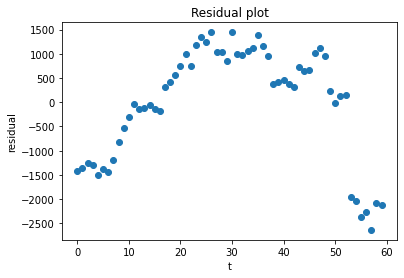

In [17]:
plt.scatter(df_2.t, df_2.bitcoin - lr_2.predict(df_2[['t']]))
plt.xlabel('t')
plt.ylabel('residual')
_ = plt.title('Residual plot')

### 3.

From the dataset 'HW3_covid_USA.csv', consider bitcoin data. Let $X_{t}$ be the bitcoin data at first 60 days.

(a) Using the following linear regression, estimate two parameters by the OLSE:
$$X_{t} = b_{0} + b_{1}t + b_{2}t^2 + \epsilon_{t}$$

In [18]:
df_3 = pd.read_csv('./data/HW3_covid19_USA.csv')[:60]
df_3['t'] = range(len(df_3))
df_3['t_square'] = df_3['t']**2
df_3.head()

,date,bitcoin,covid,t,t_square
0,20200120,8638.181440,5,0,0
1,20200121,8652.683763,0,1,1
2,20200122,8708.786013,0,2,4
3,20200123,8635.074357,0,3,9
4,20200124,8384.088777,1,4,16


In [19]:
# 1
X = pd.DataFrame([pd.Series([1]*len(df_3)), df_3.t, df_3.t_square]).T
coef = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, df_3.bitcoin))
print('b0 =', coef[0])
print('b1 =', coef[1])
print('b2 =', coef[2])

b0 = 7840.65595646319
b1 = 185.32866869750433
b2 = -3.876361279068135


In [20]:
# 2
lr_3 = LinearRegression(fit_intercept=True).fit(df_3[['t', 't_square']], df_3.bitcoin)
print('b0 =', lr_3.intercept_)
print('b1 =', lr_3.coef_[0])
print('b2 =', lr_3.coef_[1])

b0 = 7840.65595646327
b1 = 185.32866869750168
b2 = -3.8763612790681425


(b) Draw two graphs of $X_{t}$ and the estimated regression of the OLSE.

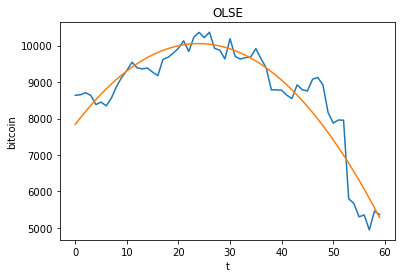

In [21]:
plt.plot(df_3.t, df_3.bitcoin)
plt.plot(df_3.t, lr_3.predict(df_3[['t', 't_square']]))
plt.xlabel('t')
plt.ylabel('bitcoin')
_ = plt.title('OLSE')

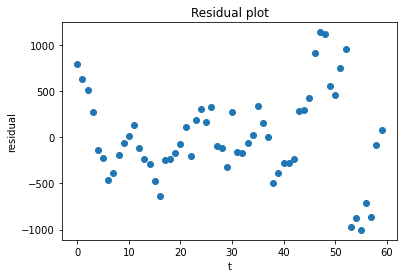

In [22]:
plt.scatter(df_3.t, df_3.bitcoin - lr_3.predict(df_3[['t', 't_square']]))
plt.xlabel('t')
plt.ylabel('residual')
_ = plt.title('Residual plot')

### 4.

(a) Compute RMSE of estimated regression in Problem 2.

In [23]:
RMSE_2 = np.sqrt(np.mean((df_2.bitcoin - lr_2.predict(df_2[['t']]))**2))
print('RMSE of Problem 2: ', RMSE_2)

RMSE of Problem 2:  1145.0210944129403


(b) Compute RMSE of estimated regression in Problem 3.

In [24]:
RMSE_3 = np.sqrt(np.mean((df_3.bitcoin - lr_3.predict(df_3[['t', 't_square']]))**2))
print('RMSE of Problem 3: ', RMSE_3)

RMSE of Problem 3:  480.30288701018753


(c) Which is better among the two estimated regression in Problem 2 and 3?

In terms of RMSE, the estimated regression in Problem 3 is better than that in Problem 2.